# Imaad Ullah Afridi
## Email: imaad3358@gmail.com
## Cell: +923087760858 and +923457760858
## WhatsApp: +923087760858

### Importing important libraries for reading the data and visualizing the data

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### head shows us the first few rows of the data while sample shows us random fews rows of our data

In [103]:
iris_data = pd.read_csv(r'E:\SZABIST\1st Semester\Tools and Techniques for Data Science (Muazz)\Lecture 3\LAB_3\data\iris.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [104]:
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
12,4.8,3.0,1.4,0.1,setosa
143,6.8,3.2,5.9,2.3,virginica
36,5.5,3.5,1.3,0.2,setosa
51,6.4,3.2,4.5,1.5,versicolor
134,6.1,2.6,5.6,1.4,virginica


### describe() is used to view some statistical details of data like percentile, mean, standard deviation etc.

In [105]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking missing values, if any

In [106]:
iris_data.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

### No missing values in our dataset, which is a good sign.

### Checking the types of each column of our dataset.

In [107]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Time for some visualization

Text(0.5, 1.0, 'Corr')

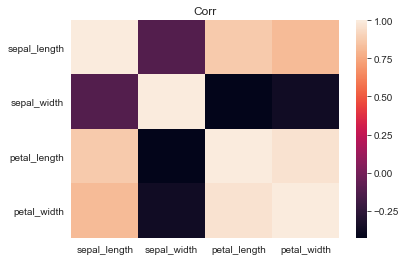

In [108]:
sns.set_style('whitegrid')
sns.heatmap(iris_data.corr())
plt.title('Corr')

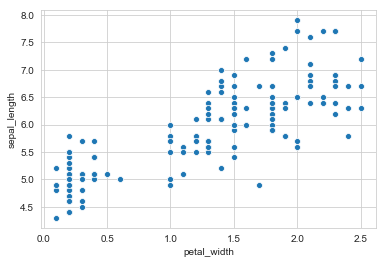

In [109]:
sns.scatterplot(x = 'petal_width', y = 'sepal_length', data = iris_data)

C:\Users\LAYI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


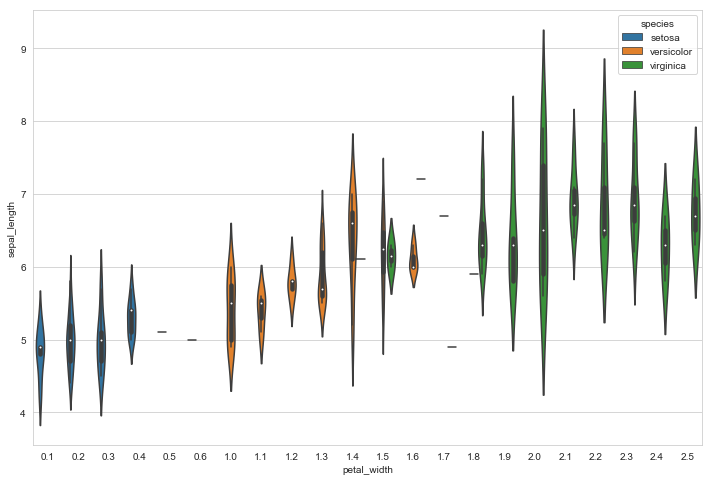

In [110]:
plt.figure(figsize=(12,8))
sns.violinplot(x = 'petal_width', y = 'sepal_length', data = iris_data, hue='species')
plt.show()

#### From the above chart we can say that the petal_width and sepal_length of Verginica is larger or bigger that the other two.

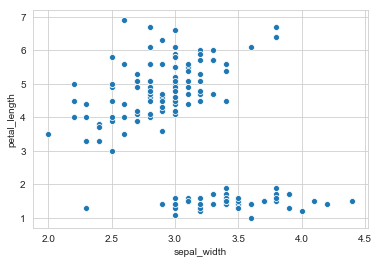

In [112]:
sns.scatterplot(x = 'sepal_width', y = 'petal_length', data = iris_data)

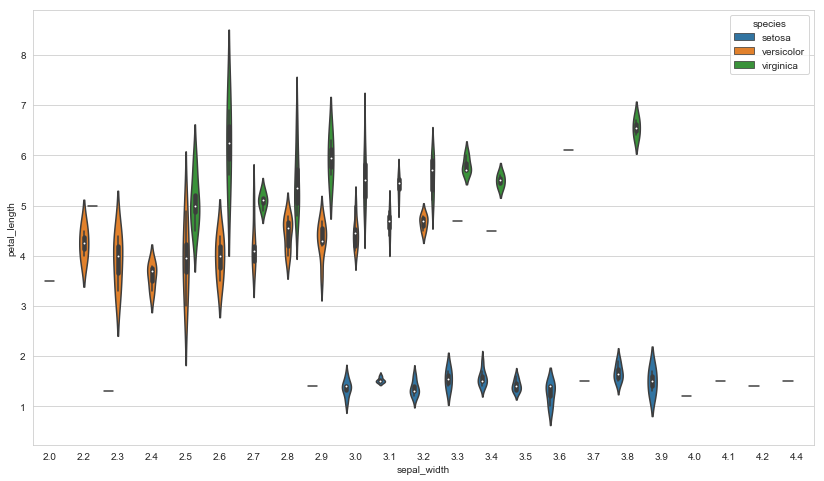

In [113]:
plt.figure(figsize=(14,8))
sns.violinplot(x = 'sepal_width', y = 'petal_length', data = iris_data, hue='species')
plt.show()

### Lets move on to the classification (Machine Learning) part.
#### First we need to split our data into training and testing parts, we will train our algorithm with train data and then test
#### that algorith with our test data.

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#### We will store our target variable(Species) in y and rest of our data in x.

In [120]:
y = iris_data.species
X = iris_data.drop('species', axis=1)
y.sample(5)

28         setosa
109     virginica
33         setosa
85     versicolor
129     virginica
Name: species, dtype: object

In [121]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Now its time to split our data into train and test.

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [173]:
print('X_train Shape: \n', X_train.shape)
print('\ny_train Shape: \n', y_train.shape)

X_train Shape: 
 (105, 4)

y_train Shape: 
 (105,)


In [174]:
print('X_test Shape: \n', X_test.shape)
print('\ny_test Shape: \n', y_test.shape)

X_test Shape: 
 (45, 4)

y_test Shape: 
 (45,)


### 1) Logistic regression

In [175]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_y_pred = log_reg.predict(X_test)

C:\Users\LAYI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LAYI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [187]:
log_reg_score = accuracy_score(y_test, log_reg_y_pred)
log_reg_score

0.9777777777777777

In [189]:
print(classification_report(y_test, log_reg_y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [190]:
log_reg.predict([[5.1,2.3,3.1,2.3]])

array(['virginica'], dtype=object)

In [191]:
log_reg.predict([[1.1,1.5,1.1,0.3]])

array(['setosa'], dtype=object)

### K-Nearest Neighbours (KNN)

In [192]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_y_pred)
print('Accuracy Score :', knn_score,'\n\n')
knn_cl_report = classification_report(y_test, knn_y_pred)
print(knn_cl_report)

Accuracy Score : 1.0 


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [193]:
knn.predict([[1.1,1.5,1.1,0.3]])

array(['setosa'], dtype=object)

In [194]:
knn.predict([[5.1,2.3,3.1,2.3]])

array(['versicolor'], dtype=object)

### Decision Tree

In [196]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
d_tree.fit(X_train, y_train)
d_tree_y_pred = d_tree.predict(X_test)

In [197]:
d_tree_score = accuracy_score(y_test, d_tree_y_pred)
print('Accuracy score: ', d_tree_score, '\n\n')
d_tree_cl_report = classification_report(y_test, d_tree_y_pred)
print(d_tree_cl_report)

Accuracy score:  1.0 


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [204]:
print(d_tree.predict([[1.1,1.5,1.1,0.3]]))
print('\n')
print(d_tree.predict([[5.1,2.3,3.1,2.3]]))

['setosa']


['virginica']


### Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

In [199]:
rf_score = accuracy_score(y_test, rf_y_pred)
print('Accuracy score: ', rf_score, '\n\n')
rf_cl_report = classification_report(y_test, rf_y_pred)
print(rf_cl_report)

Accuracy score:  1.0 


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [205]:
print(rf.predict([[1.1,1.5,1.1,0.3]]))
print('\n')
print(rf.predict([[5.1,2.3,3.1,2.3]]))

['setosa']


['virginica']


### Support Vector Machine

In [200]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)

C:\Users\LAYI\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [202]:
svm_score = accuracy_score(y_test, svm_y_pred)
print('Accuracy score: ', svm_score, '\n\n')
svm_cl_report = classification_report(y_test, svm_y_pred)
print('Classification report: \n', svm_cl_report)

Accuracy score:  1.0 


Classification report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [206]:
print(svm.predict([[1.1,1.5,1.1,0.3]]))
print('\n')
print(svm.predict([[5.1,2.3,3.1,2.3]]))

['virginica']


['versicolor']


### Naïve Bayes

In [209]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

In [210]:
nb_score = accuracy_score(y_test, nb_y_pred)
print('Accuracy score: ', nb_score, '\n\n')
nb_cl_report = classification_report(y_test, nb_y_pred)
print('Classification report: \n', nb_cl_report)

Accuracy score:  0.9777777777777777 


Classification report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [211]:
print(nb.predict([[1.1,1.5,1.1,0.3]]))
print('\n')
print(nb.predict([[5.1,2.3,3.1,2.3]]))

['setosa']


['virginica']
